# Importando dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('tips.csv')

In [2]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [3]:
renomear = {'total_bill':'valor_da_conta', 
            'tip':'gorjeta', 
            'dessert':'sobremesa', 
            'day':'dia_da_semana', 
            'time':'hora_do_dia', 
            'size':'total_de_pessoas'}
gorjetas = dados.rename(columns=renomear)

In [4]:
type(gorjetas)

pandas.core.frame.DataFrame

In [5]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

gorjetas['sobremesa'] = gorjetas.sobremesa.map(sim_nao)

In [7]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [8]:
dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

gorjetas['dia_da_semana'] = gorjetas.dia_da_semana.map(dias)

In [9]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [10]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [11]:
hora = {
    'Dinner' : 'Jantar', 
    'Lunch' : 'Almoço'
}

gorjetas['hora_do_dia'] = gorjetas.hora_do_dia.map(hora)

In [12]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Análise 1 - Valor da conta e gorjeta

In [13]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

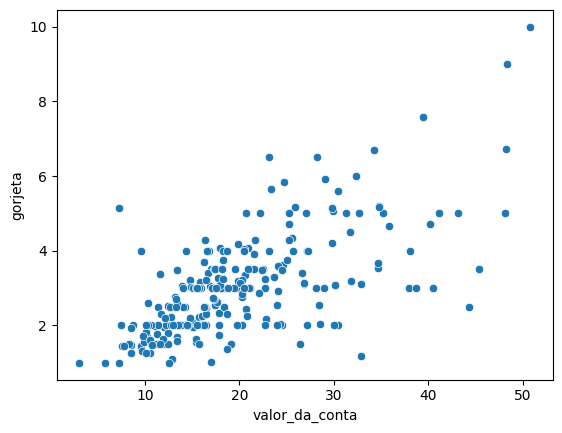

In [14]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

In [15]:
print(f'Quantidade de inputs {gorjetas.shape[0]}')
gorjetas.count()

Quantidade de inputs 244


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Campo porcentagem

In [16]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [17]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [18]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


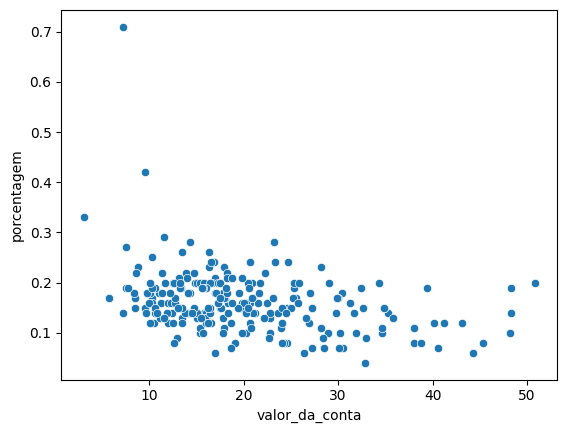

In [19]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### O valor da conta não é proporcional ao valor da gorjeta

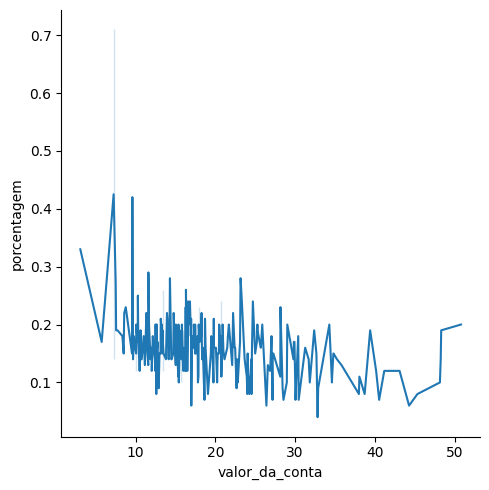

In [20]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas, kind='line')

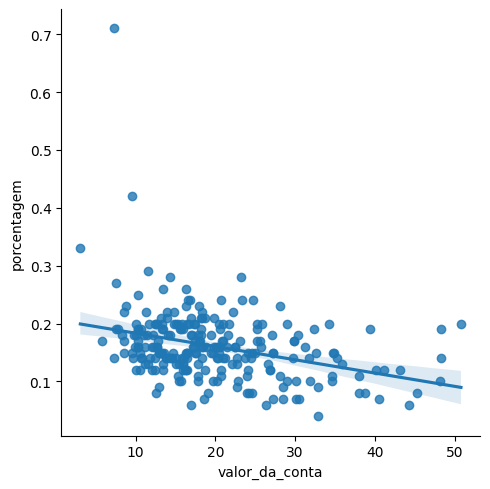

In [21]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Analise 2 Sobremesa

In [22]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [23]:
gorjetas.query('sobremesa == "Sim"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [24]:
gorjetas.query('sobremesa == "Não"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


In [25]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


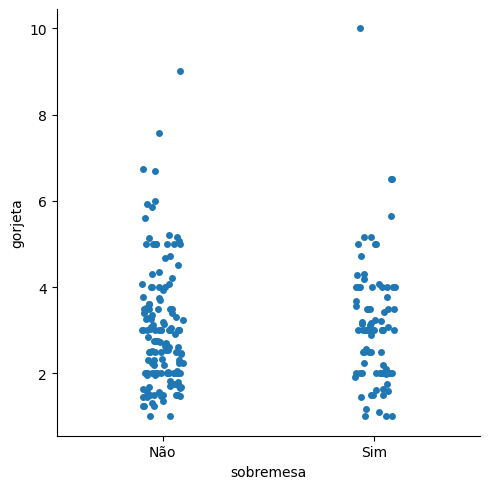

In [26]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

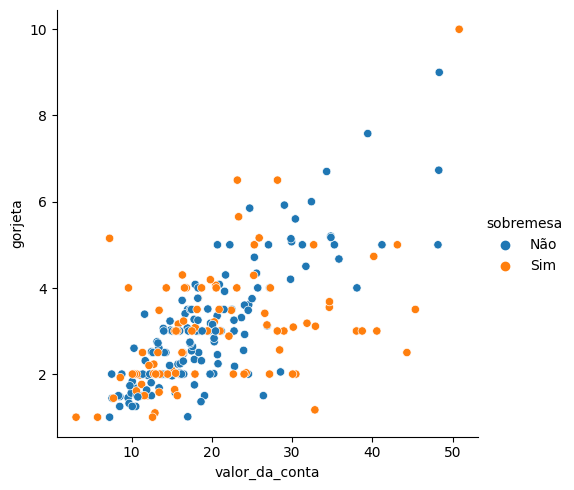

In [27]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

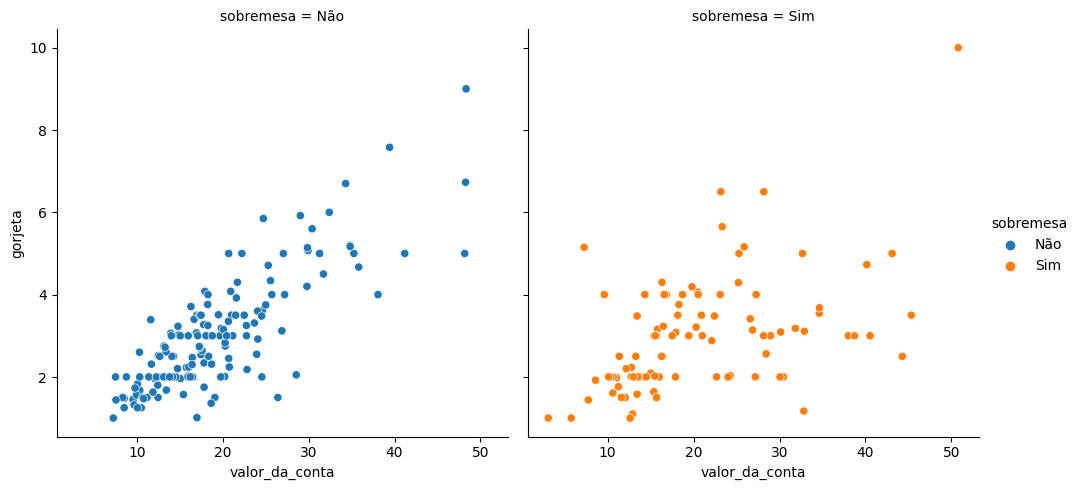

In [28]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

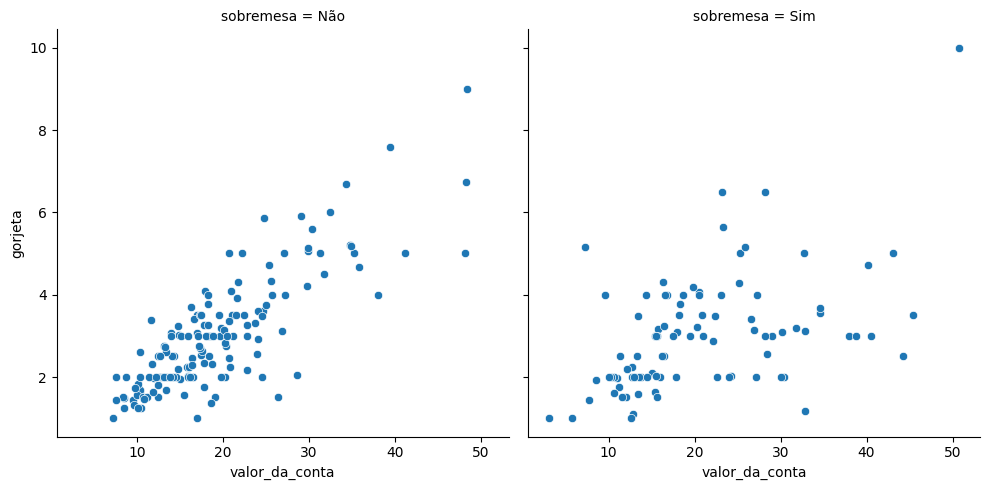

In [29]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

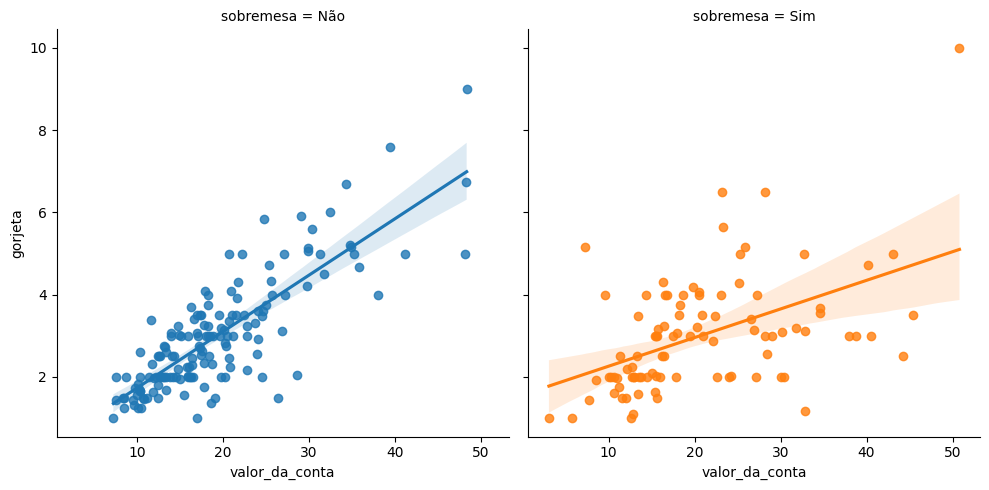

In [30]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

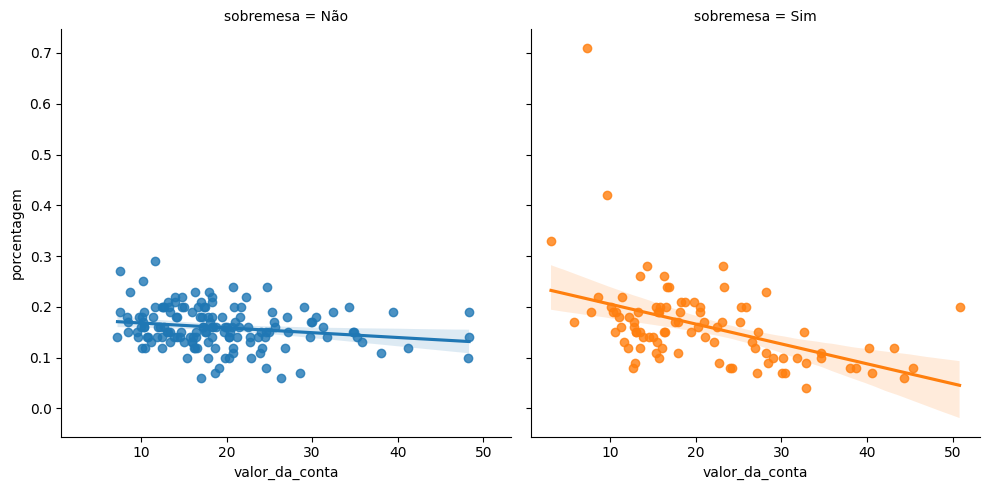

In [31]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Existe uma diferença no valor da gorjeta entre os que pediram e os que não pediram sobremesa**

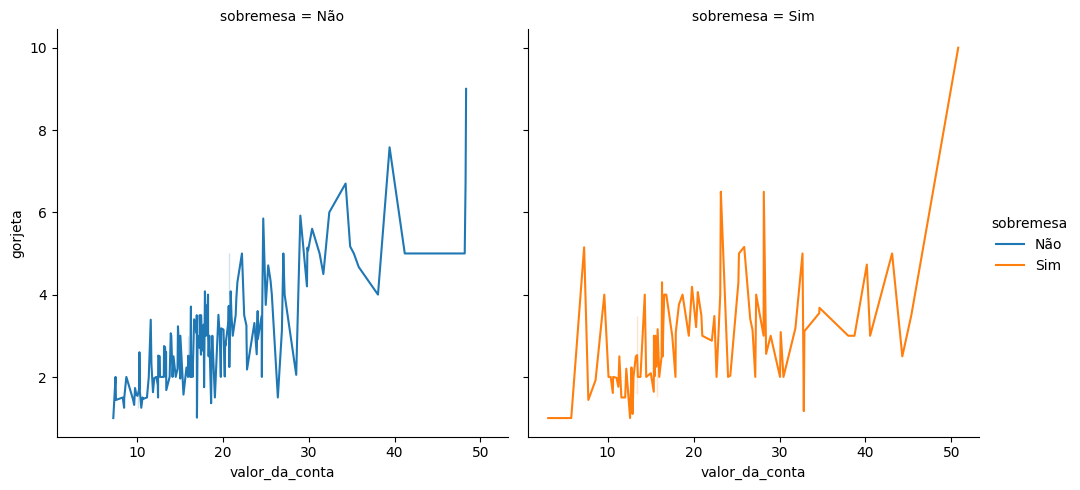

In [32]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

## Teste de hiposete

**H<sup>null</sup>**
**A distribuição da taxa de gorjeta **

In [33]:
from scipy.stats import ranksums

In [34]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem

In [35]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [36]:
r = ranksums(sobremesa, sem_sobremesa)

In [37]:
print(f"O valor do p-value é {r.pvalue}")

O valor do p-value é 0.5266635660124415


# Analise 3 Dia da semana

In [38]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

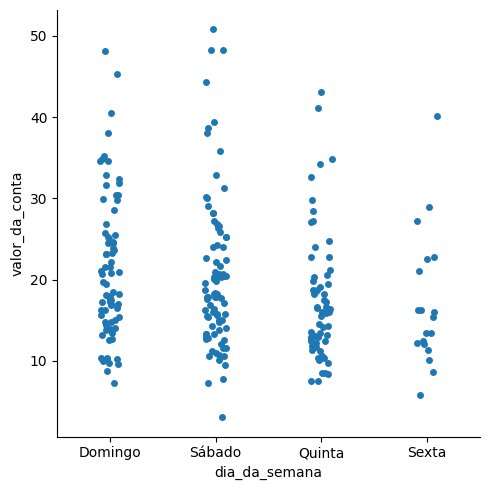

In [39]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

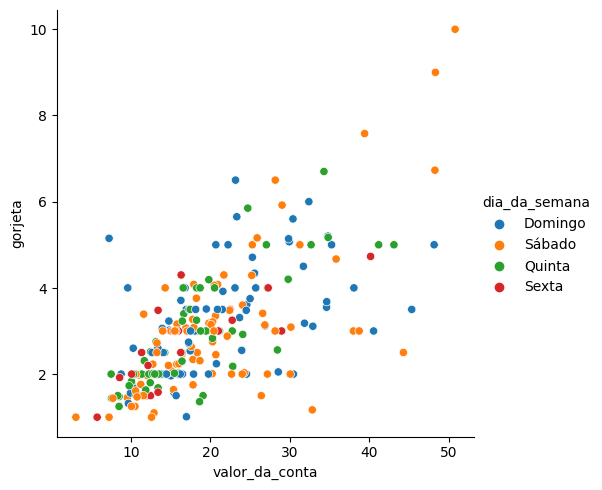

In [40]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

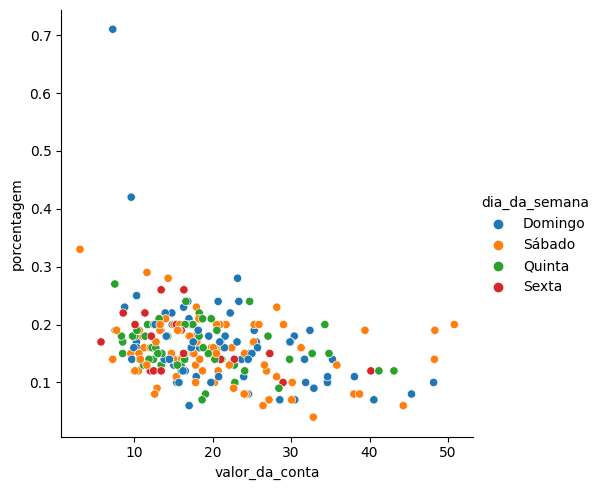

In [41]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

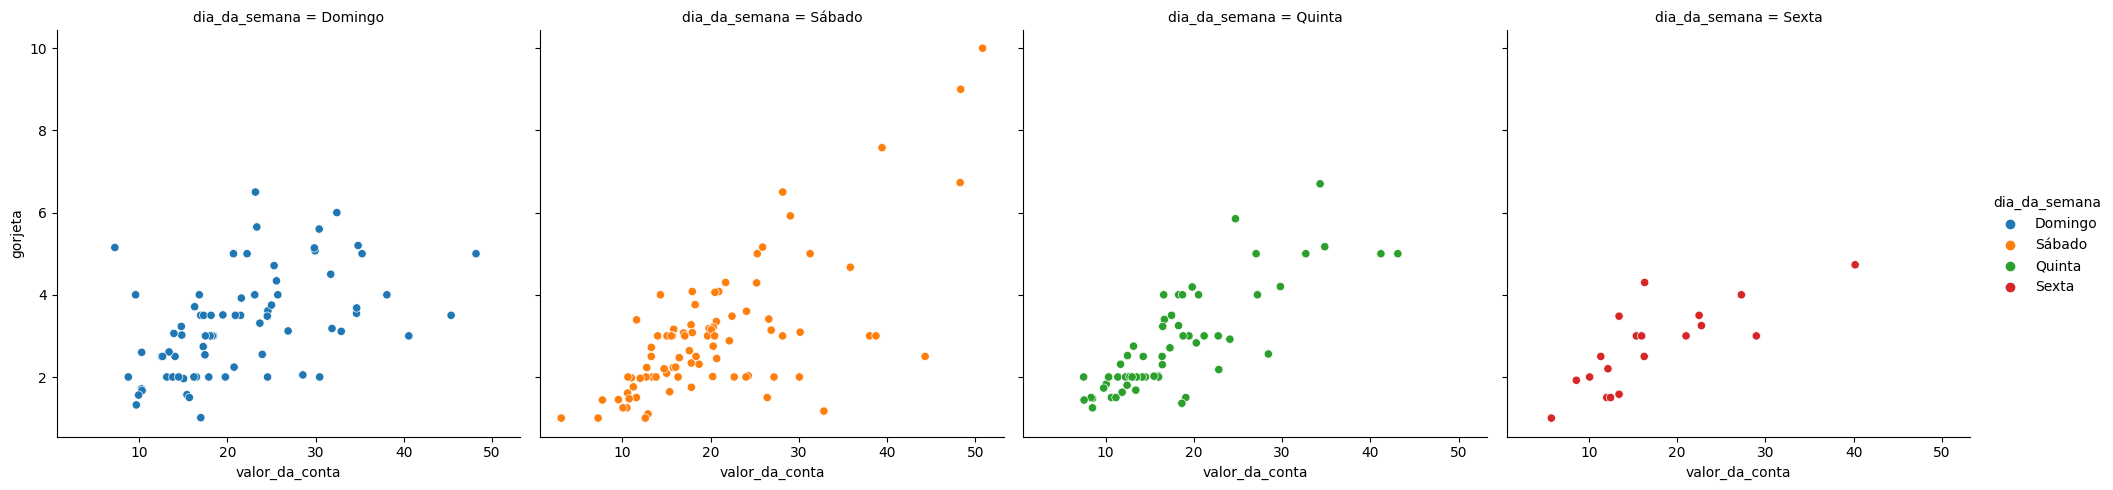

In [42]:
img = sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

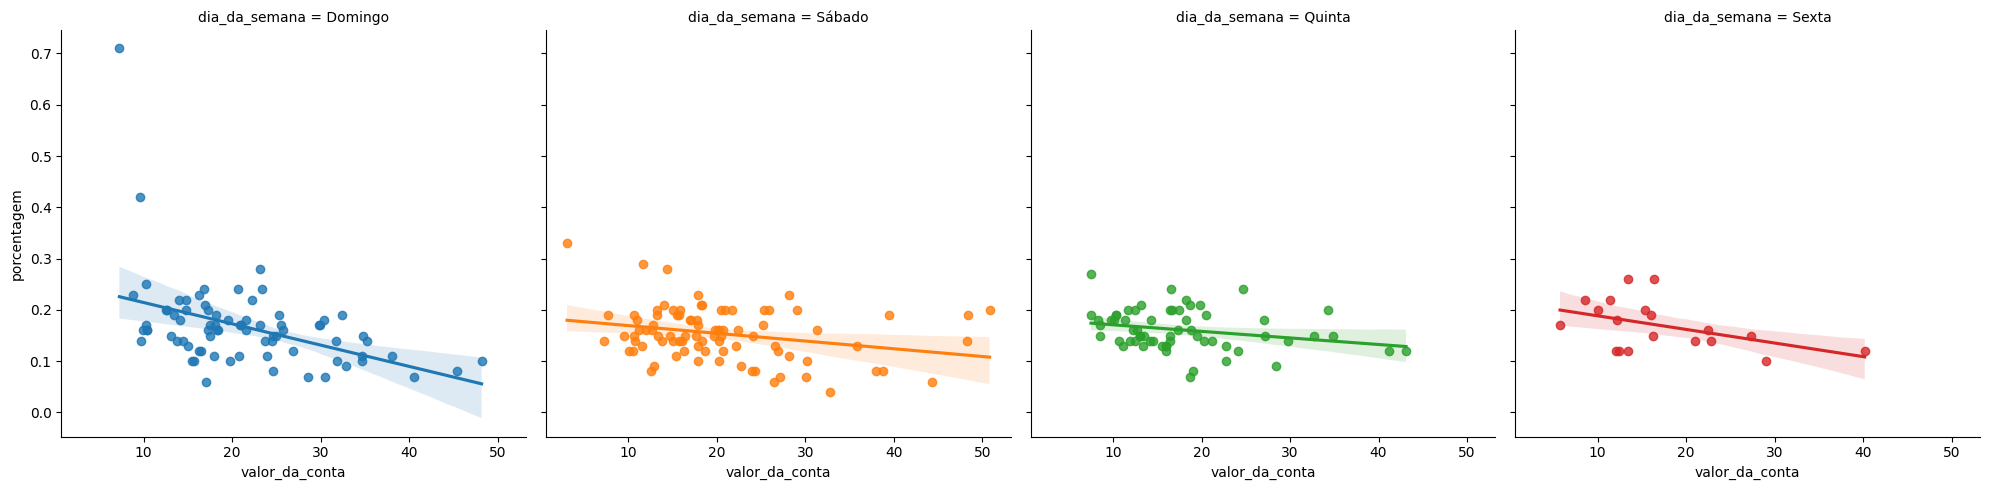

In [43]:
img = sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [44]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [45]:
gorjetas.groupby(['dia_da_semana'])[['valor_da_conta', 'gorjeta', 'porcentagem']].mean(numeric_only=True)

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [46]:
print("Frequência dos dias")
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

# Teste de Hipótese

**H<sup>null</sup>**
>**A dist do valor é igual no sábado e domingo >= 0.05**

**H<sup>alt</sup>**
>**A dist do valor não é igual no sábado e domingo < 0.05**

In [47]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [48]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [49]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2}')

O valor do p-value é RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)


**H<sup>null</sup>**
>**A dist do valor é igual no sábado e domingo >= 0.05**

In [50]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


# Análise 4 - Hora do Dia

In [51]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

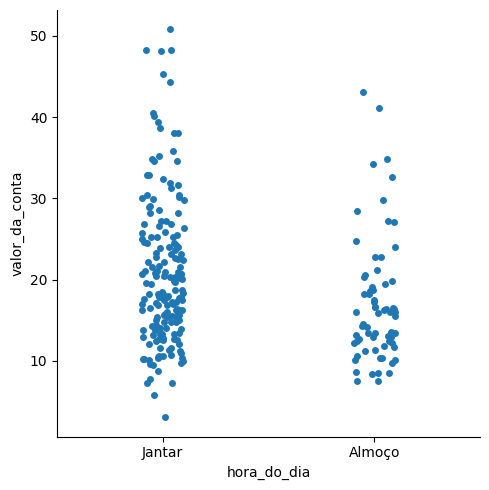

In [52]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

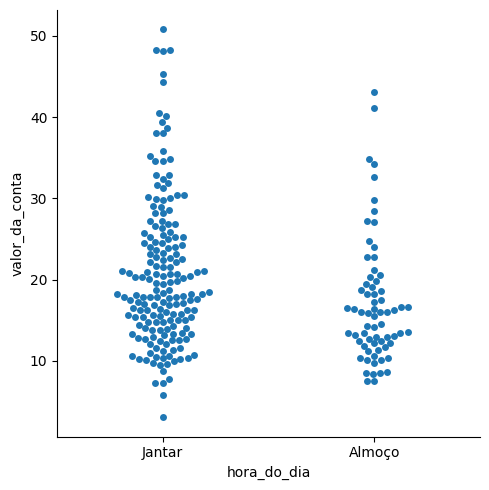

In [53]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

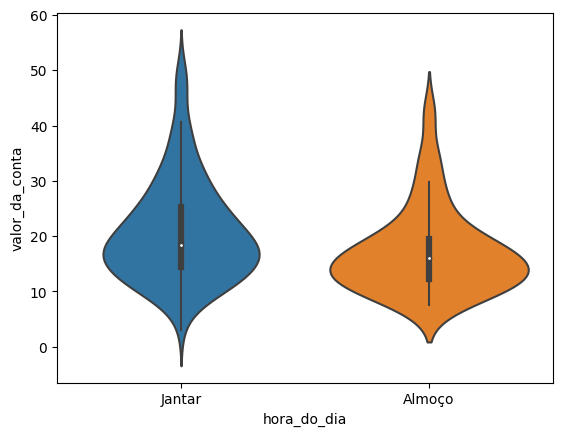

In [54]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

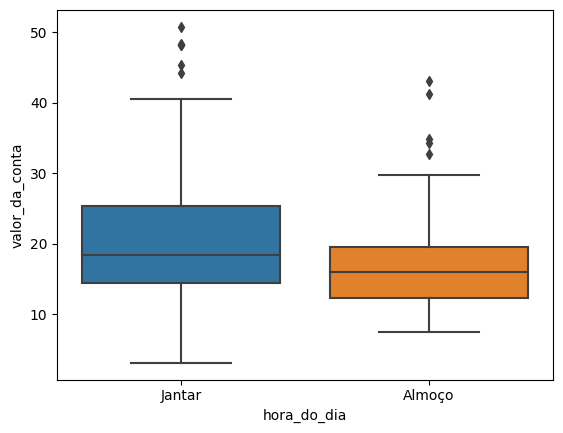

In [55]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [56]:
alomoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

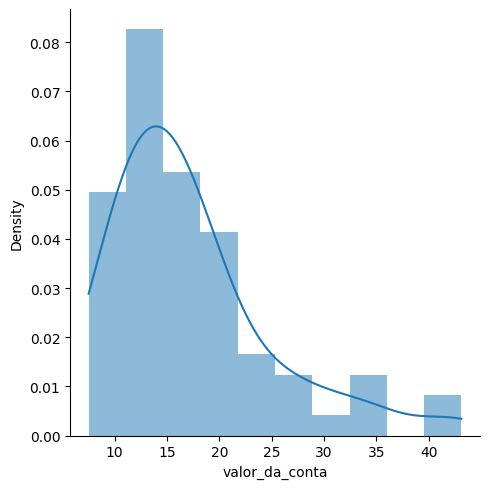

In [57]:
sns.displot(alomoco, kde=True, stat="density", linewidth=0, label="100% Equities")

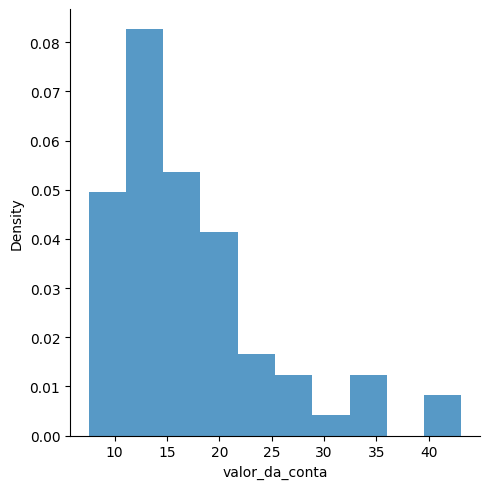

In [58]:
sns.displot(alomoco, kde=False, stat="density", linewidth=0, label="100% Equities")

In [59]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

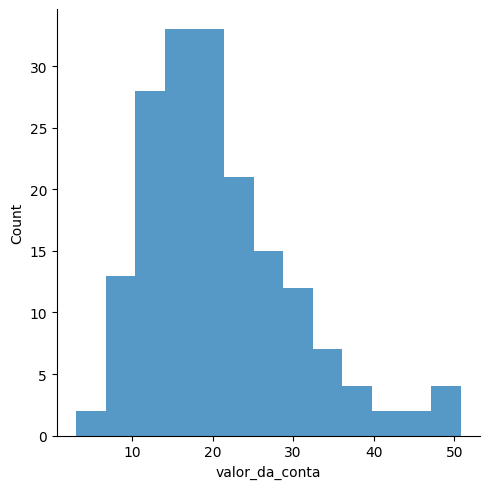

In [60]:
sns.displot(jantar, kde=False, linewidth=0, label="100% Equities")

In [61]:
gorjetas.groupby(['hora_do_dia'])[['valor_da_conta','gorjeta','porcentagem']].mean(numeric_only=True)

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipóstese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e almoço >= 0.05**

**H<sup>alt</sup>**
>**A distribuição do valor da conta é igual no jantar e almoço < 0.05**

In [62]:
r3 = ranksums(alomoco, jantar)

In [63]:
print(f"O valor de p-value é {r3.pvalue}")

O valor de p-value é 0.0011791039723641672


**H<sup>alt</sup>**
>**A distribuição do valor da conta é igual no jantar e almoço < 0.05**

# Teste de hipótese (porcentagem)

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta(porcentagem) é igual no jantar e almoço >= 0.05**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta(porcentagem) **NÃO** é igual no jantar e almoço < 0.05**

In [64]:
almoco_porcentagem = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [65]:
 jantar_porcentagem = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [66]:
print(f'O valor do p-value foi de {ranksums(almoco_porcentagem, jantar_porcentagem).pvalue}')

O valor do p-value foi de 0.2602493995587126


**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta(porcentagem) é igual no jantar e almoço >= 0.05**